Remove StandardHours and OVer18 columns because all the values are same.
Remove BusinessTravel as 71% of employees travel rarely.
Remove Daily Rate, Hourly Rate and Monthly Rate because these are all derived attributes to reduce multi-collinearity(dimensionality reduction).
Remove EmployeeCount as the value is 1 for all.

Education
1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor'

EnvironmentSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobInvolvement
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

PerformanceRating
1 'Low'
2 'Good'
3 'Excellent'
4 'Outstanding'

RelationshipSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

WorkLifeBalance
1 'Bad'
2 'Good'
3 'Better'
4 'Best'

MaritialStatus
1 'Single'
2 'Married'
3 'Divorced'

Gender
1 'Male'
2 'Female'

JobRole
1 'Sales Executive'
2 'Research Scientist'
3 'Laboratory Technician'
4 'Manufacturing Director'
5 'Healthcare Representative'
6 'Manager'
7 'Sales Representative'
8 'Research Director'
9 'Human Resources'

OverTime
1 'Yes'
0 'No'

Department
1 'Sales'
2 'Research & Development'
3 'Human Resources'

Attrition
1 'Yes'
2 'No'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

Matplotlib is building the font cache; this may take a moment.


In [3]:
data=pd.read_csv('hr_dataset.csv')

In [4]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
data.shape

(1470, 35)

In [7]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


<AxesSubplot:>

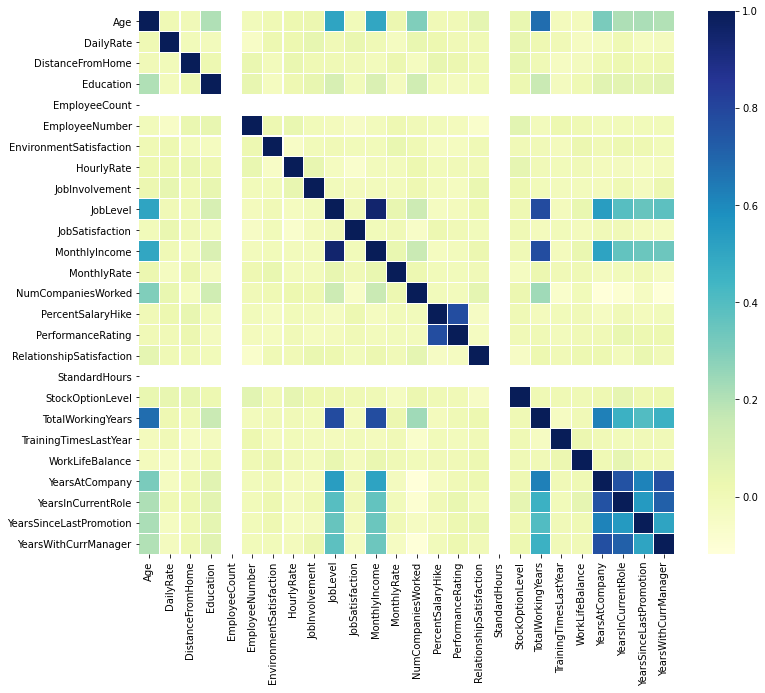

In [8]:
corrmat = data.corr()
  
f, ax = plt.subplots(figsize =(12, 10))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

In [9]:
data.JobRole.unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [10]:
data.Department.unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [11]:
data.Over18.unique()

array(['Y'], dtype=object)

In [12]:
data.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [13]:
data.BusinessTravel.value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [14]:
data.EmployeeCount.value_counts()

1    1470
Name: EmployeeCount, dtype: int64

In [15]:
df=data.drop(columns=['Over18','StandardHours','EmployeeCount','BusinessTravel','DailyRate','MonthlyRate','HourlyRate'])

In [16]:
df.describe()

,Age,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,1024.865306,2.721769,2.729932,2.063946,2.728571,6502.931293,2.693197,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,8.106864,1.024165,602.024335,1.093082,0.711561,1.106940,1.102846,4707.956783,2.498009,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,491.250000,2.000000,2.000000,1.000000,2.000000,2911.000000,1.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1020.500000,3.000000,3.000000,2.000000,3.000000,4919.000000,2.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1555.750000,4.000000,3.000000,3.000000,4.000000,8379.000000,4.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,2068.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,9.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   Department                1470 non-null   object
 3   DistanceFromHome          1470 non-null   int64 
 4   Education                 1470 non-null   int64 
 5   EducationField            1470 non-null   object
 6   EmployeeNumber            1470 non-null   int64 
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   Gender                    1470 non-null   object
 9   JobInvolvement            1470 non-null   int64 
 10  JobLevel                  1470 non-null   int64 
 11  JobRole                   1470 non-null   object
 12  JobSatisfaction           1470 non-null   int64 
 13  MaritalStatus             1470 non-null   object
 14  MonthlyIncome           

In [18]:
df.NumCompaniesWorked.value_counts()

1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: NumCompaniesWorked, dtype: int64

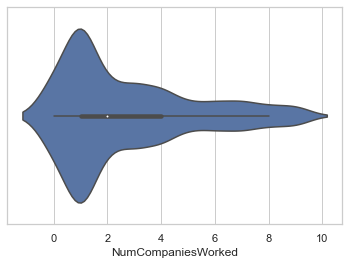

In [19]:
sns.set_theme(style="whitegrid")
age_vplot = sns.violinplot(x=df["NumCompaniesWorked"])

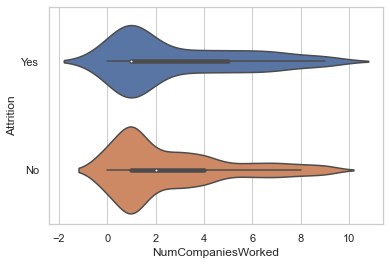

In [21]:
sns.set_theme(style="whitegrid")
age_gen_vplot = sns.violinplot(x=df["NumCompaniesWorked"], y=df["Attrition"])

<AxesSubplot:xlabel='Attrition', ylabel='NumCompaniesWorked'>

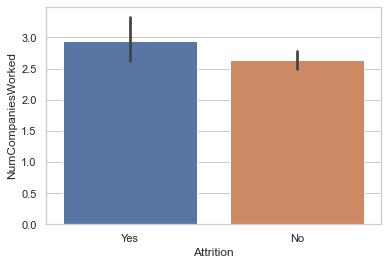

In [22]:
sns.barplot(x = 'Attrition',y = 'NumCompaniesWorked',data = df)

In [26]:
new_df= pd.get_dummies(df,columns=['OverTime'])

In [28]:
new_df = new_df.rename(columns = {'OverTime_Yes': 'OverTime'}, inplace = False)

In [30]:
new_df=new_df.drop(columns=["OverTime_No"],axis=1)

In [31]:
new_df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,OverTime
0,41,Yes,Sales,1,2,Life Sciences,1,2,Female,3,...,1,0,8,0,1,6,4,0,5,1
1,49,No,Research & Development,8,1,Life Sciences,2,3,Male,2,...,4,1,10,3,3,10,7,1,7,0
2,37,Yes,Research & Development,2,2,Other,4,4,Male,2,...,2,0,7,3,3,0,0,0,0,1
3,33,No,Research & Development,3,4,Life Sciences,5,4,Female,3,...,3,0,8,3,3,8,7,3,0,1
4,27,No,Research & Development,2,1,Medical,7,1,Male,3,...,4,1,6,3,3,2,2,2,2,0


In [32]:
new_df.PerformanceRating.value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

In [33]:
new_df.YearsAtCompany.value_counts()

5     196
1     171
3     128
2     127
10    120
4     110
7      90
9      82
8      80
6      76
0      44
11     32
20     27
13     24
15     20
14     18
22     15
12     14
21     14
18     13
16     12
19     11
17      9
24      6
33      5
25      4
26      4
31      3
32      3
36      2
29      2
27      2
23      2
30      1
34      1
37      1
40      1
Name: YearsAtCompany, dtype: int64

In [34]:
new_df.OverTime.value_counts()

0    1054
1     416
Name: OverTime, dtype: int64

In [35]:
(new_df.groupby(["PercentSalaryHike","OverTime"]).count()["PerformanceRating"])

PercentSalaryHike  OverTime
11                 0           149
                   1            61
12                 0           139
                   1            59
13                 0           144
                   1            65
14                 0           145
                   1            56
15                 0            80
                   1            21
16                 0            55
                   1            23
17                 0            66
                   1            16
18                 0            60
                   1            29
19                 0            55
                   1            21
20                 0            40
                   1            15
21                 0            36
                   1            12
22                 0            41
                   1            15
23                 0            19
                   1             9
24                 0            12
                   1       

In [38]:
du=(new_df.groupby(["PercentSalaryHike","OverTime"]).count()["PerformanceRating"]/df.groupby(["PercentSalaryHike"]).count()["PerformanceRating"])
du=du.to_frame()
du=du.rename(columns = {'PerformanceRating': 'Count'}, inplace = False)
du

Count
PercentSalaryHike OverTime          
11                0         0.709524
                  1         0.290476
12                0         0.702020
                  1         0.297980
13                0         0.688995
                  1         0.311005
14                0         0.721393
                  1         0.278607
15                0         0.792079
                  1         0.207921
16                0         0.705128
                  1         0.294872
17                0         0.804878
                  1         0.195122
18                0         0.674157
                  1         0.325843
19                0         0.723684
                  1         0.276316
20                0         0.727273
                  1         0.272727
21                0         0.750000
                  1         0.250000
22                0         0.732143
                  1         0.267857
23                0         0.678571
                  1         0.321429
24                0         0.571429
                  1         0.428571
25                0         0.722222
                  1         0.277778

<AxesSubplot:xlabel='PercentSalaryHike,OverTime'>

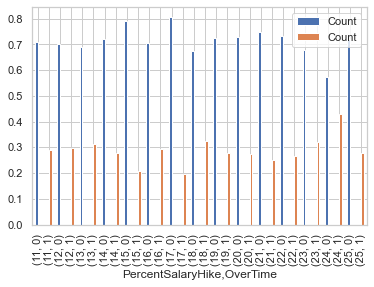

In [39]:
pd.concat(
    [du.iloc[::2], du.iloc[1::2]],
    axis=1).plot.bar()

In [67]:
du=(new_df.groupby(["PercentSalaryHike","Attrition"]).count()["Age"]/df.groupby(["PercentSalaryHike"]).count()["Age"])
du=du.to_frame()
du=du.rename(columns = {'Age': 'Count'}, inplace = False)
du

Count
PercentSalaryHike Attrition          
11                No         0.804762
                  Yes        0.195238
12                No         0.833333
                  Yes        0.166667
13                No         0.837321
                  Yes        0.162679
14                No         0.880597
                  Yes        0.119403
15                No         0.821782
                  Yes        0.178218
16                No         0.820513
                  Yes        0.179487
17                No         0.829268
                  Yes        0.170732
18                No         0.853933
                  Yes        0.146067
19                No         0.881579
                  Yes        0.118421
20                No         0.872727
                  Yes        0.127273
21                No         0.895833
                  Yes        0.104167
22                No         0.785714
                  Yes        0.214286
23                No         0.785714
                  Yes        0.214286
24                No         0.714286
                  Yes        0.285714
25                No         0.944444
                  Yes        0.055556

<AxesSubplot:xlabel='PercentSalaryHike,Attrition'>

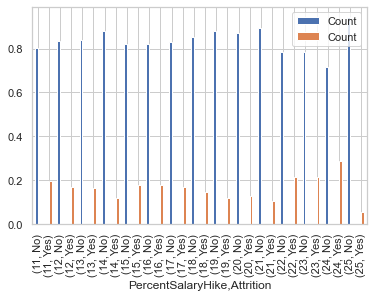

In [41]:
pd.concat(
    [du.iloc[::2], du.iloc[1::2]],
    axis=1).plot.bar()

In [44]:
du=(new_df.groupby(["YearsAtCompany","Attrition"]).count()["PerformanceRating"]/df.groupby(["YearsAtCompany"]).count()["PerformanceRating"])
du=du.to_frame()
du=du.rename(columns = {'PerformanceRating': 'Count'}, inplace = False)
du

Count
YearsAtCompany Attrition          
0              No         0.636364
               Yes        0.363636
1              No         0.654971
               Yes        0.345029
2              No         0.787402
...                            ...
33             Yes        0.200000
34             No         1.000000
36             No         1.000000
37             No         1.000000
40             Yes        1.000000

[64 rows x 1 columns]

In [47]:
new_df.RelationshipSatisfaction.value_counts()

3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64

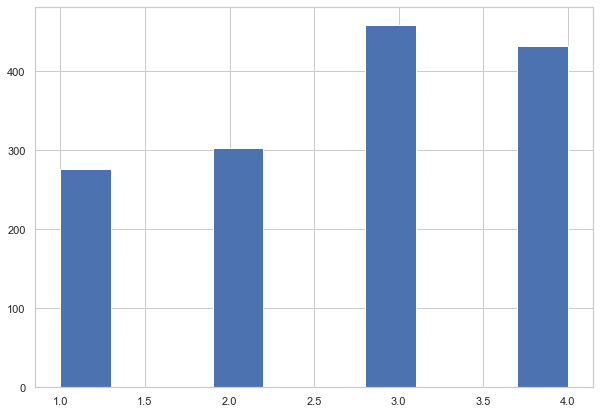

In [48]:
fig = plt.figure(figsize =(10, 7))
plt.hist(df["RelationshipSatisfaction"])
plt.show()

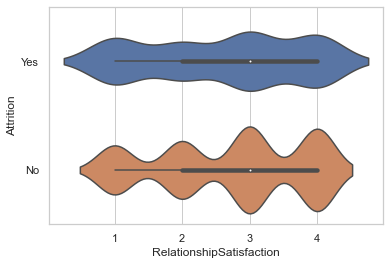

In [49]:
sns.set_theme(style="whitegrid")
age_gen_vplot = sns.violinplot(x=df["RelationshipSatisfaction"], y=df["Attrition"])

In [51]:
du=(new_df.groupby(["RelationshipSatisfaction","Attrition"]).count()["OverTime"]/df.groupby(["RelationshipSatisfaction"]).count()["OverTime"])
du=du.to_frame()
du=du.rename(columns = {'OverTime': 'Count'}, inplace = False)
du

Count
RelationshipSatisfaction Attrition          
1                        No         0.793478
                         Yes        0.206522
2                        No         0.851485
                         Yes        0.148515
3                        No         0.845316
                         Yes        0.154684
4                        No         0.851852
                         Yes        0.148148

In [53]:
new_df.TotalWorkingYears.value_counts()

10    202
6     125
8     103
9      96
5      88
7      81
1      81
4      63
12     48
3      42
15     40
16     37
13     36
11     36
21     34
17     33
14     31
2      31
20     30
18     27
19     22
23     22
22     21
24     18
28     14
25     14
26     14
0      11
29     10
31      9
32      9
27      7
30      7
33      7
36      6
34      5
37      4
35      3
40      2
38      1
Name: TotalWorkingYears, dtype: int64

In [54]:
du=(new_df.groupby(["TotalWorkingYears","Attrition"]).count()["OverTime"]/df.groupby(["TotalWorkingYears"]).count()["OverTime"])
du=du.to_frame()
du=du.rename(columns = {'OverTime': 'Count'}, inplace = False)
du

Count
TotalWorkingYears Attrition          
0                 No         0.545455
                  Yes        0.454545
1                 No         0.506173
                  Yes        0.493827
2                 No         0.709677
...                               ...
35                No         1.000000
36                No         1.000000
37                No         1.000000
38                No         1.000000
40                Yes        1.000000

[71 rows x 1 columns]

In [56]:
new_df.EducationField.unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

(array([606.,   0.,  82.,   0., 464.,   0., 159.,   0., 132.,  27.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

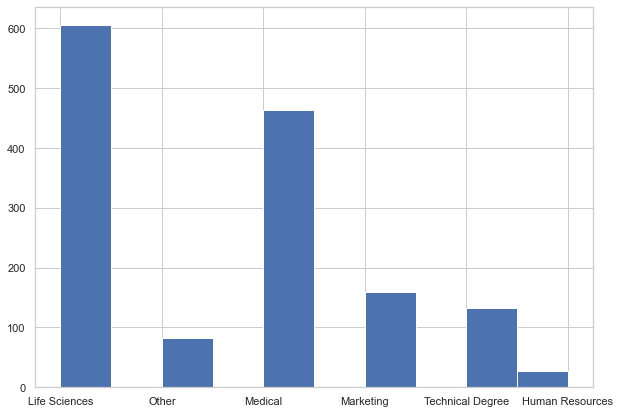

In [57]:

fig = plt.figure(figsize =(10, 7))
plt.hist(df["EducationField"])

In [62]:
du=(new_df.groupby(["EducationField","Education","PercentSalaryHike"]).count()["Age"]/df.groupby(["EducationField","Education"]).count()["Age"])
du=du.to_frame()
du=du.rename(columns = {'Age': 'Count'}, inplace = False)
du

Count
EducationField   Education PercentSalaryHike          
Human Resources  1         11                 0.500000
                           21                 0.500000
                 2         11                 0.500000
                           19                 0.500000
                 3         11                 0.062500
...                                                ...
Technical Degree 4         22                 0.032258
                           23                 0.032258
                           25                 0.032258
                 5         16                 0.666667
                           20                 0.333333

[282 rows x 1 columns]

In [60]:

du=(new_df.groupby(["EducationField","PercentSalaryHike","Attrition"]).count()["Age"]/df.groupby(["EducationField"]).count()["Age"])
du=du.to_frame()
du=du.rename(columns = {'Age': 'Count'}, inplace = False)
du

Count
EducationField   PercentSalaryHike Attrition          
Human Resources  11                No         0.111111
                                   Yes        0.074074
                 12                No         0.111111
                                   Yes        0.037037
                 13                No         0.148148
...                                                ...
Technical Degree 22                No         0.007576
                                   Yes        0.015152
                 23                Yes        0.015152
                 24                Yes        0.007576
                 25                No         0.015152

[144 rows x 1 columns]

In [63]:
new_df.StockOptionLevel.value_counts()

0    631
1    596
2    158
3     85
Name: StockOptionLevel, dtype: int64

In [65]:
du=(new_df.groupby(["StockOptionLevel","Attrition"]).count()["Age"]/df.groupby(["StockOptionLevel"]).count()["Age"])
du=du.to_frame()
du=du.rename(columns = {'Age': 'Count'}, inplace = False)
du

Count
StockOptionLevel Attrition          
0                No         0.755943
                 Yes        0.244057
1                No         0.906040
                 Yes        0.093960
2                No         0.924051
                 Yes        0.075949
3                No         0.823529
                 Yes        0.176471

<AxesSubplot:xlabel='StockOptionLevel,Attrition'>

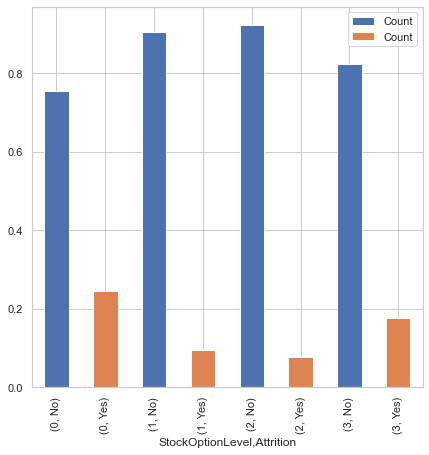

In [66]:
pd.concat(
    [du.iloc[::2], du.iloc[1::2]],
    axis=1).plot.bar(figsize=(7,7), stacked=True)

In [68]:
new_df= pd.get_dummies(new_df, columns = ['Attrition'])
new_df.head()

,Age,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,OverTime,Attrition_No,Attrition_Yes
0,41,Sales,1,2,Life Sciences,1,2,Female,3,2,...,8,0,1,6,4,0,5,1,0,1
1,49,Research & Development,8,1,Life Sciences,2,3,Male,2,2,...,10,3,3,10,7,1,7,0,1,0
2,37,Research & Development,2,2,Other,4,4,Male,2,1,...,7,3,3,0,0,0,0,1,0,1
3,33,Research & Development,3,4,Life Sciences,5,4,Female,3,1,...,8,3,3,8,7,3,0,1,1,0
4,27,Research & Development,2,1,Medical,7,1,Male,3,1,...,6,3,3,2,2,2,2,0,1,0


In [71]:
new_df=new_df.drop(columns=['Department','DistanceFromHome','EmployeeNumber','EnvironmentSatisfaction','Gender','JobInvolvement','JobLevel','JobRole','JobSatisfaction','MaritalStatus','MonthlyIncome','TrainingTimesLastYear','WorkLifeBalance','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager'],axis=1)

<AxesSubplot:>

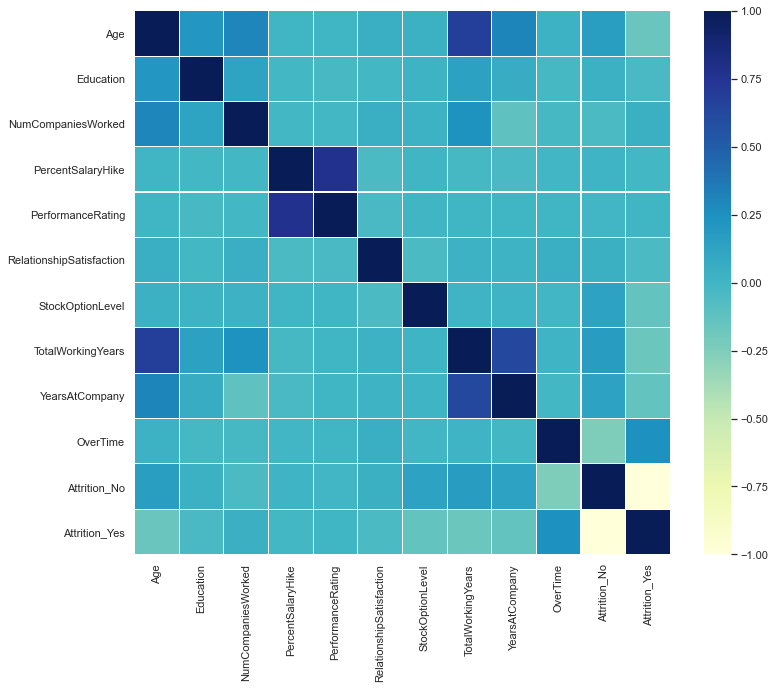

In [72]:
corrmat = new_df.corr()
  
f, ax = plt.subplots(figsize =(12, 10))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)